In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
data_set = pd.read_csv('./coleta_ego.csv')

In [ ]:
G = nx.Graph()

relationship_types = ['Tipo de Contato', 'Tipo de Contato.1', 'Tipo de Contato.2', 'Tipo de Contato.3']
alter_names = ['Nome do Alter 1', 'Nome do Alter 2', 'Nome do Alter 3', 'Nome do Alter 4']
frequency_cols = ['Frequência de Interação com Alter 1', 'Frequência de Interação com Alter 2', 'Frequência de Interação com Alter 3', 'Frequência de Interação com Alter 4']


frequency_mapping = {
    'Baixo (1 ou 2 vezes)': 1,
    'Médio (3 ou 4 vezes)': 2,
    'Alto (5x ou mais)': 3
}

for index, row in data_set.iterrows():
    ego = row['Seu Nome']
    for i in range(4):
        alter = row[alter_names[i]]
        relationship_type = row[relationship_types[i]]
        frequency = row[frequency_cols[i]]
        if pd.notna(alter):
            # Map frequency string to a numerical value for edge width
            frequency_value = frequency_mapping.get(frequency, 0) # Default to 0 if frequency is not in mapping
            G.add_edge(ego, alter, relationship=relationship_type, frequency=frequency_value)

print(f"Número de nós: {G.number_of_nodes()}")
print(f"Número de arestas: {G.number_of_edges()}")

Número de nós: 50
Número de arestas: 59


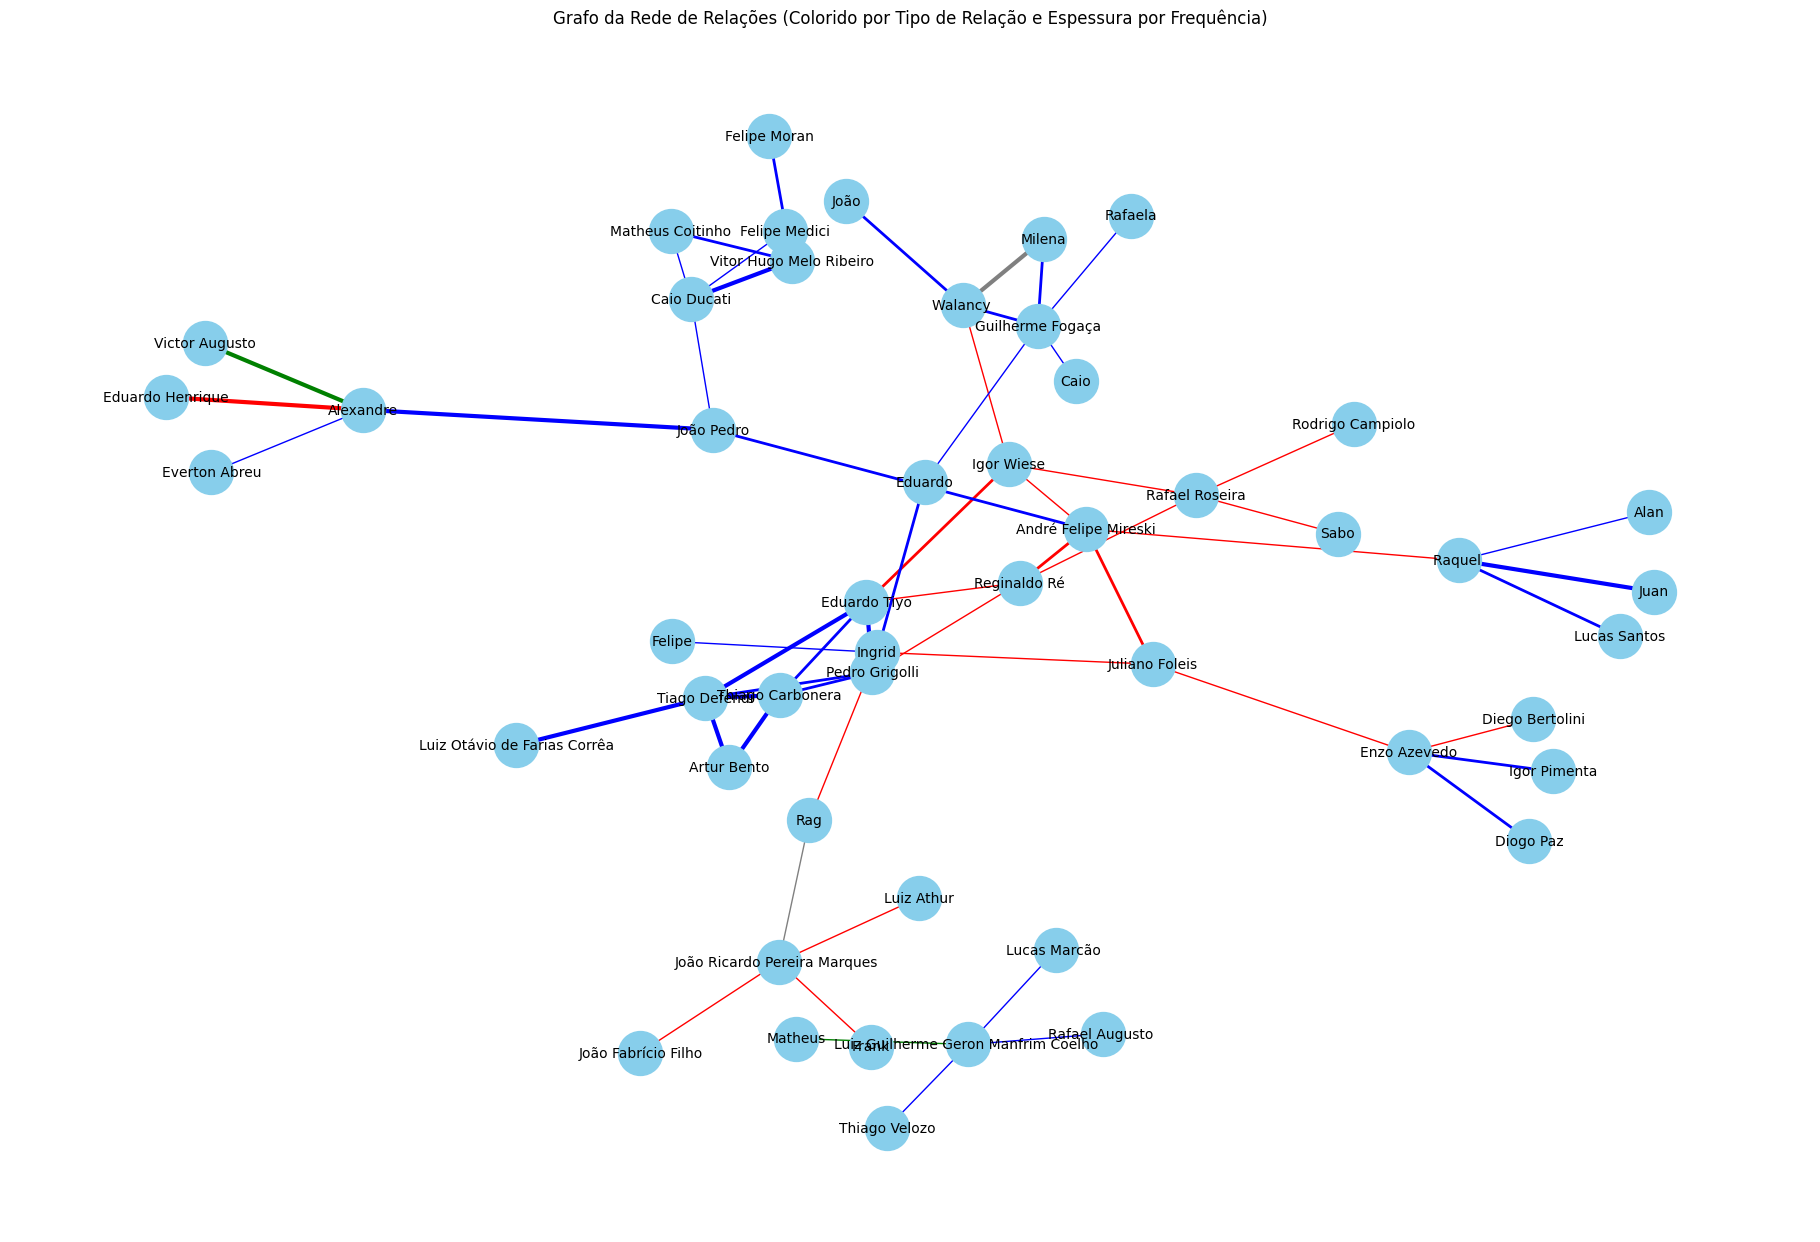

In [ ]:
plt.figure(figsize=(18, 12))

# Create a dictionary to map relationship types to colors
relationship_colors = {
    'Professor': 'red',
    'Colega do curso': 'blue',
    'Colega de outro curso': 'green',
    'Outros': 'gray',
    # Add more relationship types and colors as needed
}

# Get the relationship type for each edge and map it to a color
edge_colors = [relationship_colors.get(G[u][v]['relationship'], 'gray') for u, v in G.edges()]

# Get the frequency for each edge and use it for edge width
edge_widths = [G[u][v].get('frequency', 1) for u, v in G.edges()] # Default to 1 if frequency is not available


pos = nx.spring_layout(G, k=0.3)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, edge_color=edge_colors, width=edge_widths) # Added width parameter
plt.title("Grafo da Rede de Relações (Colorido por Tipo de Relação e Espessura por Frequência)")
plt.show()